#**NOTEs:**

1. 'bmi' has almost 4% value with Nan. Do we need to delete them. Only bmi has NaN as values in CSV. But,

2. There are other cases, where they have just put a 0 or Unknown. There

In [2]:
#@title importing
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#@title Loading Dataset


# drive.mount('/content/drive')
project_path = 'https://raw.githubusercontent.com/rosh2525/StrokePrediction/main/healthcare-dataset-stroke-data.csv'

dataset = pd.read_csv(project_path)
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


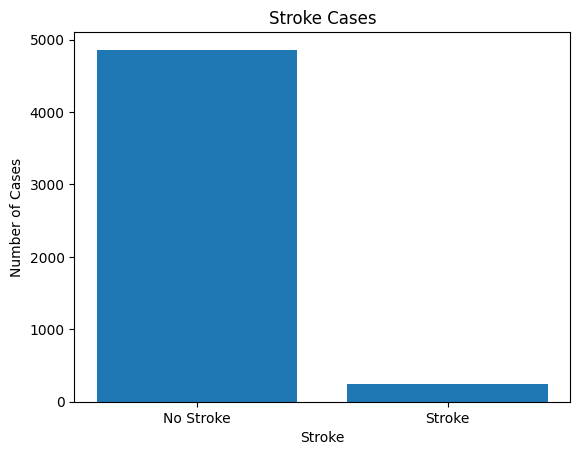

The number instances with stroke is 249
The number instances without stroke is 4861


In [4]:

# rep of number of value_counts of taget values ( 1/0 ).

plt.bar(['No Stroke', 'Stroke'], [dataset['stroke'].value_counts()[0], dataset['stroke'].value_counts()[1]])
plt.title('Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Number of Cases')
plt.show()

print(f"The number instances with stroke is {dataset['stroke'].value_counts()[1]}")
print(f"The number instances without stroke is {dataset['stroke'].value_counts()[0]}")

In [5]:
print(f"The number instances with stroke is {dataset['stroke'].value_counts()[1]}")
print(f"The number instances without stroke is {dataset['stroke'].value_counts()[0]}")

The number instances with stroke is 249
The number instances without stroke is 4861


In [6]:
dataset['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [7]:
#Number of null values
dataset['bmi'].isnull().sum()

# print((201/5110)*100)
print(1)

1


In [8]:
# for i in [ 1 , 3 , 4, 5, 6, 7, 10 ,11]:
#   print(dataset.iloc[:,i].value_counts())
#   print()


for i in [0,2,8,9]:
  print(dataset.iloc[:,i].min())
  # print(1544/5110)

67
0.08
55.12
10.3


In [9]:
must_be_children = dataset[dataset['age'] <= 9 ]

must_be_children['smoking_status'].value_counts()

smoking_status
Unknown    472
Name: count, dtype: int64

In [10]:
print(1544-472)

1072


In [25]:
dataset['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [29]:
must_be_children = dataset[dataset['bmi'] == pd.null ]

must_be_children['stroke'].value_counts()

AttributeError: module 'pandas' has no attribute 'null'

In [30]:
no_stroke = 0
stroke = 0

for i in dataset[dataset["bmi"].isna()].index.tolist():
    if dataset.loc[i, "stroke"] == 0:
        no_stroke += 1
    else:
        stroke += 1

print(stroke)
print(no_stroke)

40
161


In [33]:
201/5110 * 100

3.9334637964774952